#### Imports

In [1]:
import pandas as pd

#### Import Dataset

In [2]:
data = pd.read_excel('dataset.xlsx', header=[0,1])

#### Drop "X1, X2, X3..." Part of Column Names to Produce Clean Column Names

In [3]:
data = data.droplevel(level=0, axis=1)

#### Standardize All Column Names in Lowercase and Replace All Spaces with Underscore

In [4]:
data.rename(columns = {col: col.lower().replace(" ", "_") for col in data.columns}, inplace=True)

#### Change Data Types

##### Current Data Types

In [5]:
data.dtypes

id                            int64
limit_bal                     int64
sex                           int64
education                     int64
marriage                      int64
age                           int64
pay_0                         int64
pay_2                         int64
pay_3                         int64
pay_4                         int64
pay_5                         int64
pay_6                         int64
bill_amt1                     int64
bill_amt2                     int64
bill_amt3                     int64
bill_amt4                     int64
bill_amt5                     int64
bill_amt6                     int64
pay_amt1                      int64
pay_amt2                      int64
pay_amt3                      int64
pay_amt4                      int64
pay_amt5                      int64
pay_amt6                      int64
default_payment_next_month    int64
dtype: object

##### Amend Data Types

For each of the categorical columns currently represented by integers, convert their values to categories

In [6]:
for col in ('sex', 'education', 'marriage', 'default_payment_next_month'):
    data[col] = pd.Categorical(data[col].values)
for i in (0,2,3,4,5,6):
    data['pay_' + str(i)] = pd.Categorical(data['pay_'+ str(i)].values)

In [7]:
data.dtypes

id                               int64
limit_bal                        int64
sex                           category
education                     category
marriage                      category
age                              int64
pay_0                         category
pay_2                         category
pay_3                         category
pay_4                         category
pay_5                         category
pay_6                         category
bill_amt1                        int64
bill_amt2                        int64
bill_amt3                        int64
bill_amt4                        int64
bill_amt5                        int64
bill_amt6                        int64
pay_amt1                         int64
pay_amt2                         int64
pay_amt3                         int64
pay_amt4                         int64
pay_amt5                         int64
pay_amt6                         int64
default_payment_next_month    category
dtype: object

##### One column as Example

In [8]:
data.education

0        2
1        2
2        2
3        2
4        2
        ..
29995    3
29996    3
29997    2
29998    3
29999    2
Name: education, Length: 30000, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

#### Distribution of Target Variable

In [9]:
target_var = data.default_payment_next_month.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default_payment_next_month, dtype: float64


<AxesSubplot: >

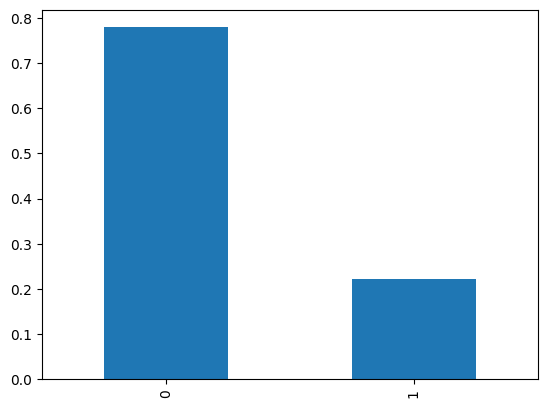

In [10]:
print(target_var)
target_var.plot(kind='bar')

#### Scan Dataset for Null or Missing Values

In [11]:
data.isnull().sum().sum()

0

#### Descriptive Statistics of Numerical Columns

In [12]:
data.describe().round()

,id,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,15000.0,167484.0,35.0,51223.0,49179.0,47013.0,43263.0,40311.0,38872.0,5664.0,5921.0,5226.0,4826.0,4799.0,5216.0
std,8660.0,129748.0,9.0,73636.0,71174.0,69349.0,64333.0,60797.0,59554.0,16563.0,23041.0,17607.0,15666.0,15278.0,17777.0
min,1.0,10000.0,21.0,-165580.0,-69777.0,-157264.0,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,7501.0,50000.0,28.0,3559.0,2985.0,2666.0,2327.0,1763.0,1256.0,1000.0,833.0,390.0,296.0,252.0,118.0
50%,15000.0,140000.0,34.0,22382.0,21200.0,20088.0,19052.0,18104.0,17071.0,2100.0,2009.0,1800.0,1500.0,1500.0,1500.0
75%,22500.0,240000.0,41.0,67091.0,64006.0,60165.0,54506.0,50190.0,49198.0,5006.0,5000.0,4505.0,4013.0,4032.0,4000.0
max,30000.0,1000000.0,79.0,964511.0,983931.0,1664089.0,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0


#### Correlation of Numerical Columns

In [13]:
data.corr()

C:\Users\mitch\AppData\Local\Temp\ipykernel_11320\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,id,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
id,1.000000,0.026179,0.018678,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000
limit_bal,0.026179,1.000000,0.144713,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
age,0.018678,0.144713,1.000000,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
bill_amt1,0.019389,0.285430,0.056239,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
bill_amt2,0.017982,0.278314,0.054283,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256
bill_amt3,0.024354,0.283236,0.053710,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326
bill_amt4,0.040351,0.293988,0.051353,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637
bill_amt5,0.016705,0.295562,0.049345,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184
bill_amt6,0.016730,0.290389,0.047613,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494
pay_amt1,0.009742,0.195236,0.026147,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735


In [16]:
data.to_csv('dataset_clean.csv', index=False)